# Chaos from an exponential decay process

Exponential decay to zero can be represented by the differential equation
$$
    dN = -\lambda N dt,
$$
where $\lambda > 0$ is a rate constant and $N$ is the quantity that's decaying. This equation has solution $N(t) = N_0 \operatorname{exp}\left(-\lambda t\right).$ Suppose that there's a function $M = \exp\left(N\right)$. Then (obviously) M can be expressed as $M(t) = \exp\left( N_0 \exp\left(-\lambda t\right)\right),$ but we can also express the differential equation as 
$$
    dM = -\lambda M \log(M) dt.  \tag{D}
$$
This is similar to the [logistic differential equation](https://en.wikipedia.org/wiki/Logistic_function#Logistic_differential_equation)
$$
    dM = \lambda M (1-M) dt.  \tag{L}
$$
Imagine that $(1-M)$ is replaced by $-\log(M)$. These are labeled Equation D for "decay" and L for "logistic". We can plot the right-hand side of both and compare them. The general shape of the curve is similar, and both have zeros at 0 and 1. (Technically the curve from equation D is undefined at 0, but $\lim_{x\to0^+}x \log(x) = 0$.)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.seterr(divide='ignore', invalid='ignore')
%matplotlib inline

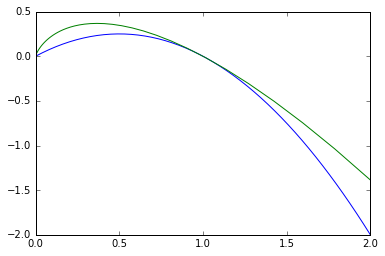

In [2]:
x_logistic = np.linspace(0,2)
y_logistic = x_logistic*(1-x_logistic)
x_decay = np.logspace(-7, 1, base=2)#use logspace to get more detail near 0
y_decay = -x_decay*np.log(x_decay)
plt.plot(x_logistic , y_logistic)
plt.plot(x_decay, y_decay)
plt.show()

The discretized version of equation L is 
$$
x_{n+1} = x_n + \lambda x_n (1-x_n),
$$
which has chaotic behavior for certain ranges of $\lambda$. (It's a transformed version of the traditional logistic map $y_{n+1} = r y_n (1-y_n)$: the two are related by $r = \lambda + 1$ and $\lambda x_n  = r y_n$.) The discretized version of equation D also behaves chaotically: it is
$$
x_{n+1} = x_n - \lambda x_n \log(x_n).
$$
Here are bifurcation diagrams for both. They look like the logistic map bifurcation diagram, except scaled and stretched.

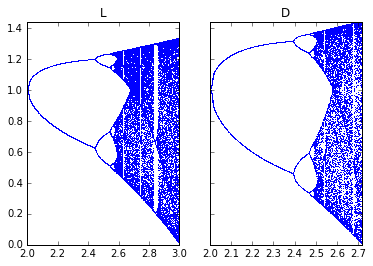

In [3]:
#the idea is to take a bunch of steps from the recurrence,
#then throw away the earlier ones before it reaches steady-state.
#then, just plot all the remaining values

t_start = 2 #smallest lambda.
t_end = 3 #largest lambda
n = 1000# # of different t values
m = 200 # of steps
burnin_fctr = 0.75 #proportion of steps to throw away

t = np.linspace(t_start,t_end,n)

x_logistic = np.empty((m,n))
x_logistic[0] = 3-t#initial conditions, kinda arbitrary

x_decay = x_logistic.copy()

for i in range(m-1):
    x_logistic[i+1] = x_logistic[i] + t * x_logistic[i] * (1-x_logistic[i]) 
    x_decay[i+1] = np.where(x_decay[i] == 0, 0, x_decay[i] - t * x_decay[i] * np.log(x_decay[i]) )

burnin_start = int(np.round(m* (burnin_fctr)))
burnin_logistic = x_logistic[burnin_start:]
burnin_decay = x_decay[burnin_start:]

y_logistic = burnin_logistic.flatten()
y_decay = burnin_decay.flatten()

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title('L')
ax1.scatter(np.tile(t,m - burnin_start),y_logistic,marker=',',s=1,lw=0)
ax2.set_title('D')
ax2.scatter(np.tile(t,m - burnin_start),y_decay,marker=',',s=1,lw=0)
ax1.set_xlim([2,3])
ax2.set_xlim([2,np.e])

ax1.set_ylim([0,max(y_decay)])

plt.show()